In [6]:
#Exploring outliers

include("readclassjson.jl")

data = readclassjson("outlier_rem.json")
U_train = data["U_train"]
U_test = data["U_test"]
v_train = data["v_train"]
v_test = data["v_test"]

250-element Vector{Float64}:
  1.7204127668177487
 -1.3549759292493215
  4.530924231742739
 -0.7759758549010882
 -1.1267665846388213
 -2.1092109190314545
 -1.2125486470187687
  2.2333872226755083
  2.3337230281536834
 -1.9672924255975532
 -0.12183561486256227
 -0.3384176654560345
  1.0051236713175908
  ⋮
 -2.4715102952153183
  2.5441658935373255
 -1.7768406884779093
 -0.8380565076648329
 -0.06739386130991289
  3.8136347265963435
  2.4507781536564797
 -0.4733452998950703
  4.144330122610916
 -3.0312305741535153
 -3.774234981700489
  5.177749088480776

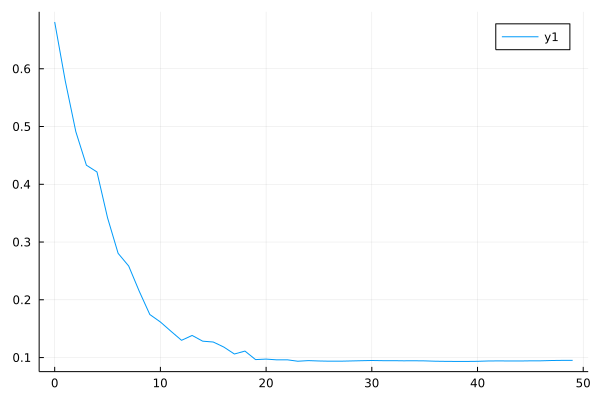

In [7]:
function rms(y, yhat)
    return sqrt(sum((yhat .- y).^2)/size(y, 1))
end

function get_max_loss_index(y, yhat)
    losses = (yhat .- y).^2
    max_loss_index = argmax(losses)
    return max_loss_index
end

test_rmss = zeros(50)

for i in 1:50
    theta = U_train \ v_train
    argmax = get_max_loss_index(v_train, U_train*theta)
    
    test_rmss[i] = rms(v_test, U_test*theta)    

    U_train = U_train[setdiff(1:end, argmax), :]
    v_train = v_train[setdiff(1:end, argmax)]
end

using Plots
plot(0:49, test_rmss)

In [8]:
print(test_rmss)
# My guess is that 19 data points are corrupted. 
# This is because before removing 19 data points, the rms decreases significantly.
# After removing 19 data points, the rms stays relatively stable at ~0.095. 

[0.6809932237472066, 0.5790151607182928, 0.4910832502444452, 0.43301029857327306, 0.4213233450051099, 0.3419972924452056, 0.28044162443414117, 0.25850463288512743, 0.21475531390163485, 0.1744871027259205, 0.16156997639286333, 0.1455147973700191, 0.12985577041359073, 0.1382964660377361, 0.1283716507179476, 0.12689658194186376, 0.11816265248020974, 0.10614736774239349, 0.1112195924474536, 0.09647526018804953, 0.09732424872943694, 0.0960418916844291, 0.09611035918619887, 0.09363770088177763, 0.09471373166308734, 0.0940667872528081, 0.09369651859184376, 0.09368825201727413, 0.09410695243818207, 0.09453188212680633, 0.09491387463166798, 0.09460911095279603, 0.0946090263523945, 0.09436752479591022, 0.09444467077758206, 0.09426085351191796, 0.09365574899500975, 0.09341304129723937, 0.09329380015199411, 0.0932928401171021, 0.09349393454308878, 0.09406198469393877, 0.09420812673552441, 0.09408974407099151, 0.09404264395613877, 0.09431915078722708, 0.09436252619347013, 0.09487624831821535, 0.095